# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >500 cm/s flows in u/v


In [23]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [24]:
xdf = xa.load_dataset('11bsp2a_0058m.trimmed.nc')

In [25]:
len(xdf.depth)

18

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

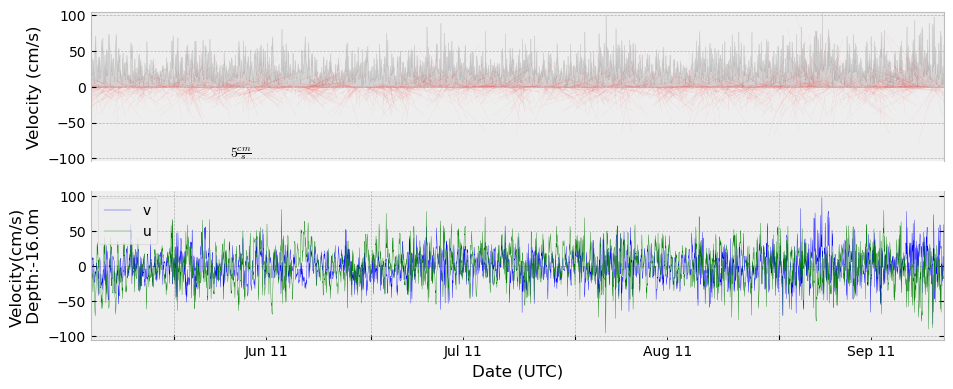

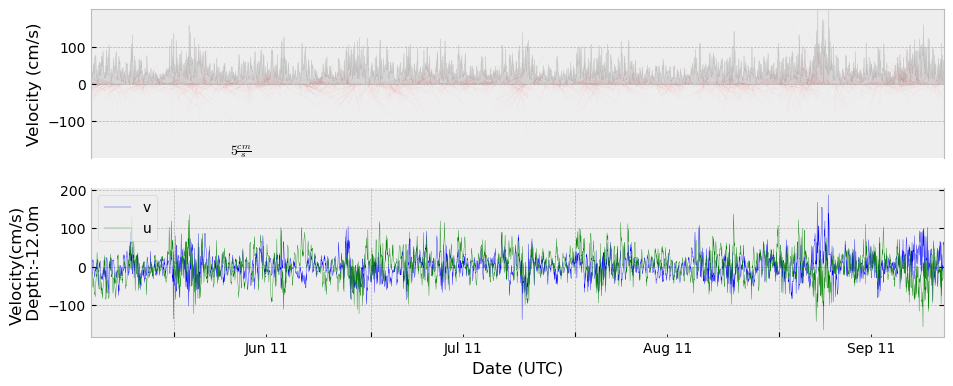

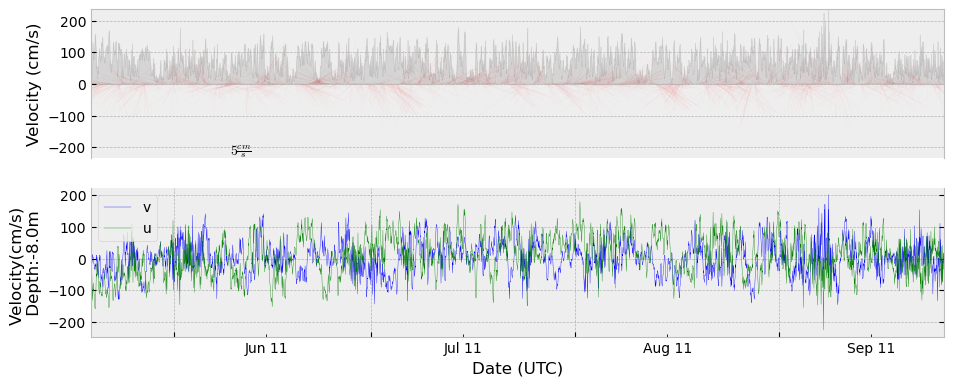

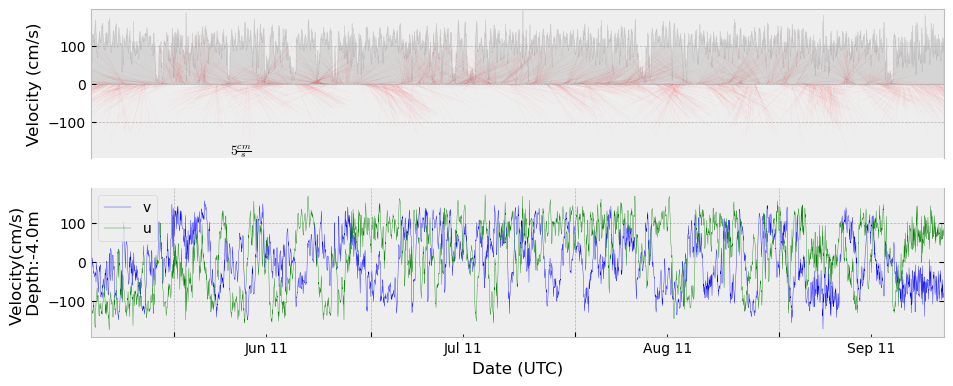

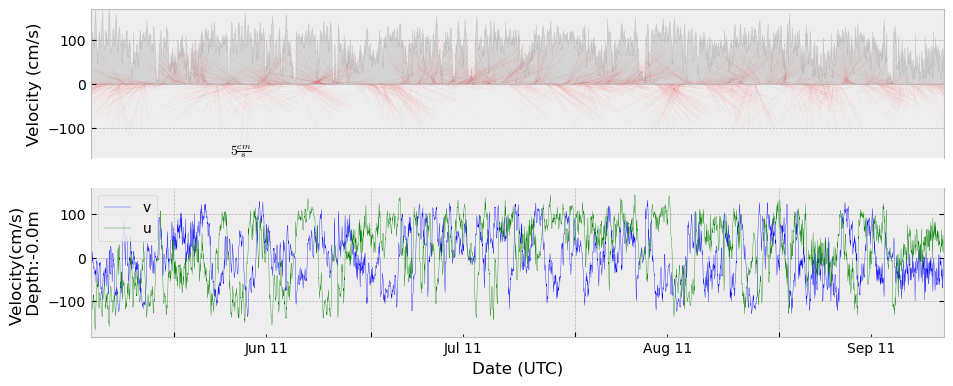

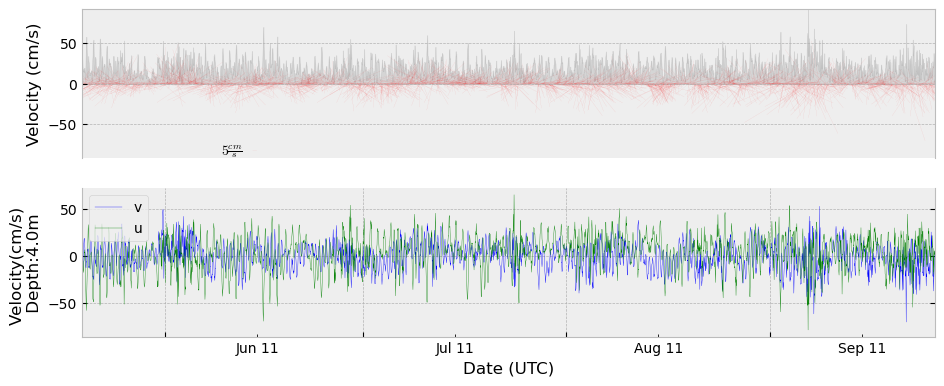

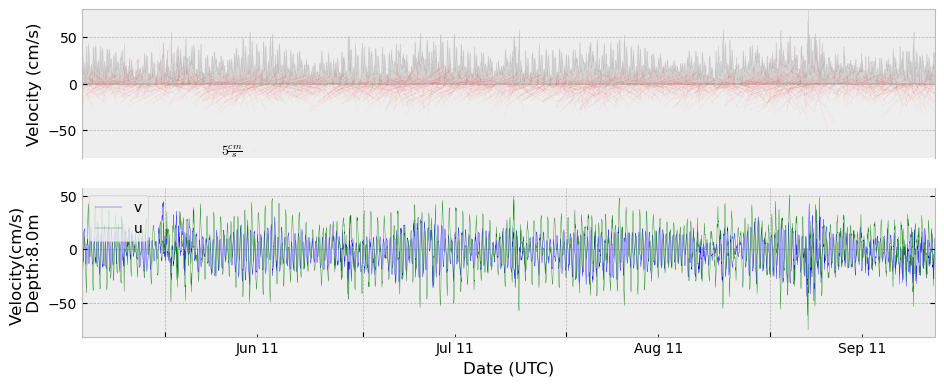

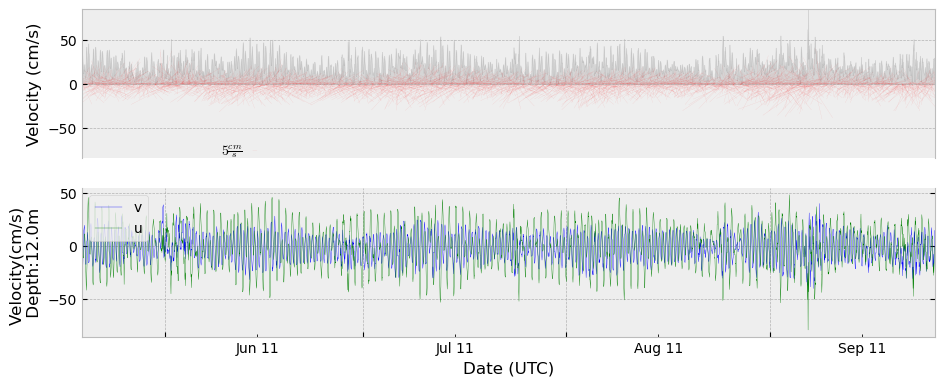

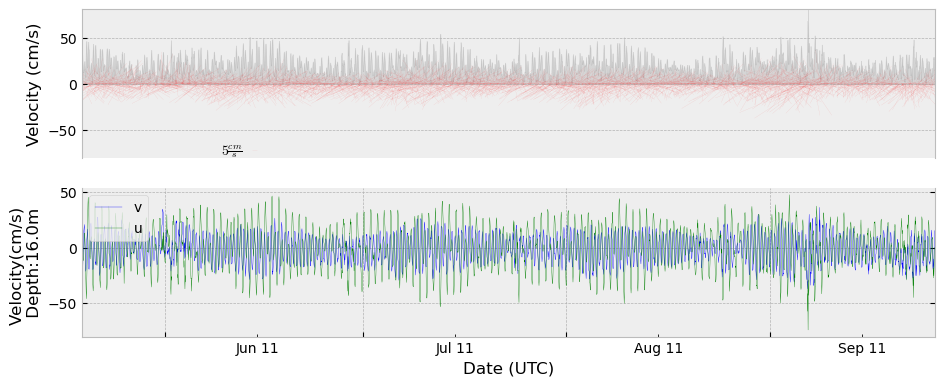

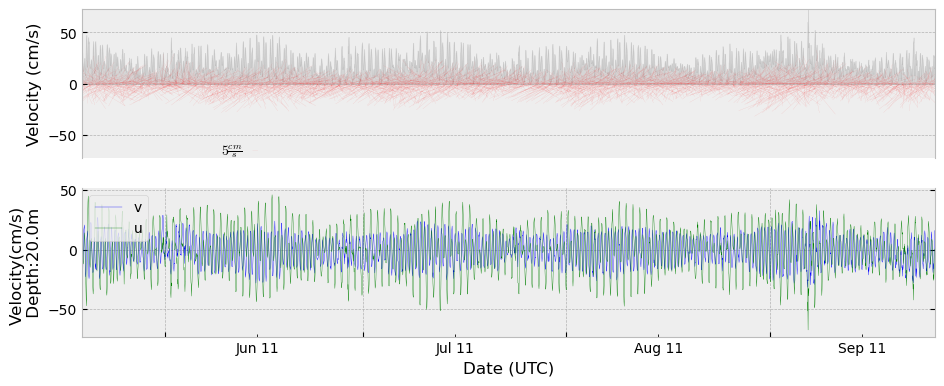

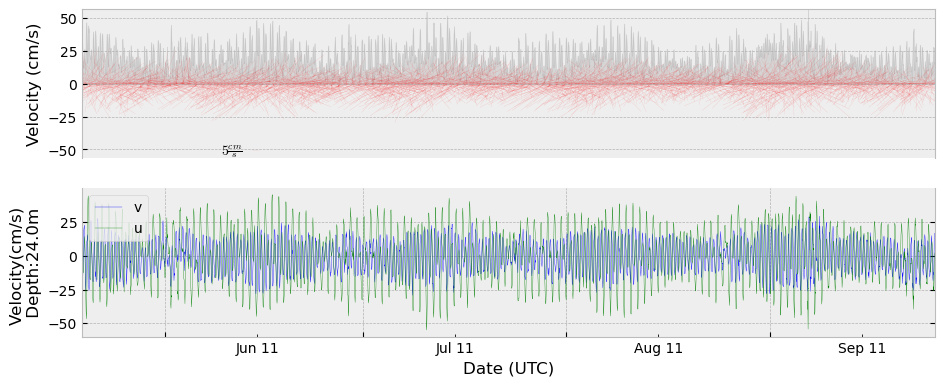

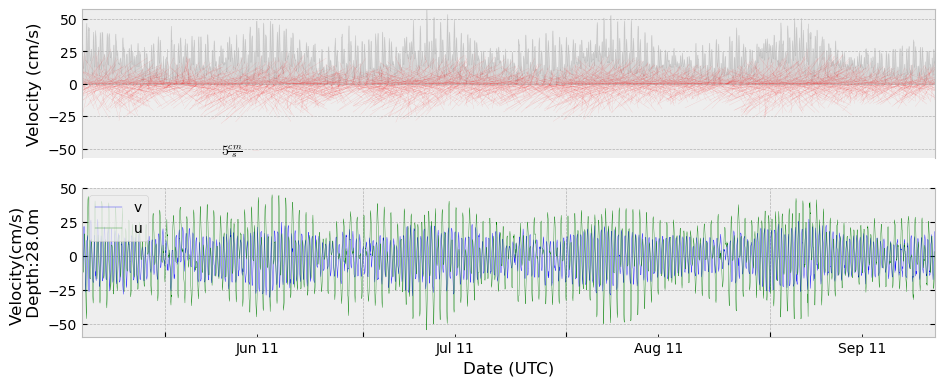

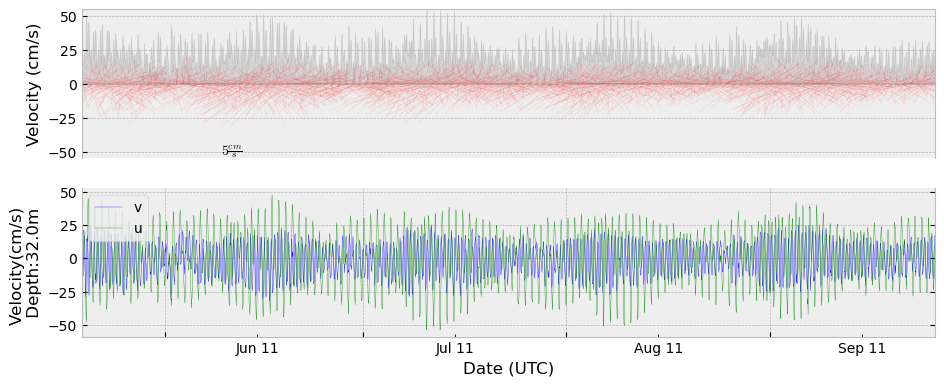

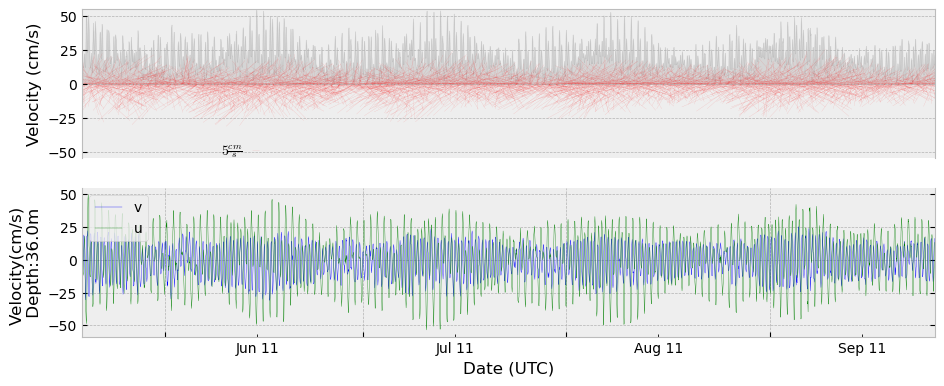

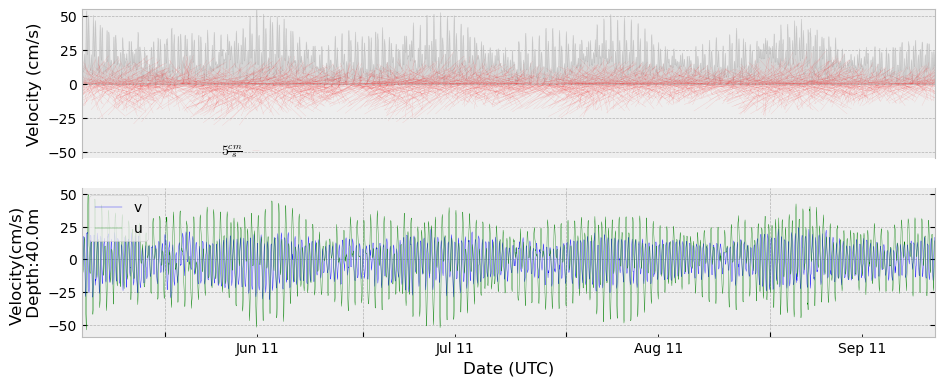

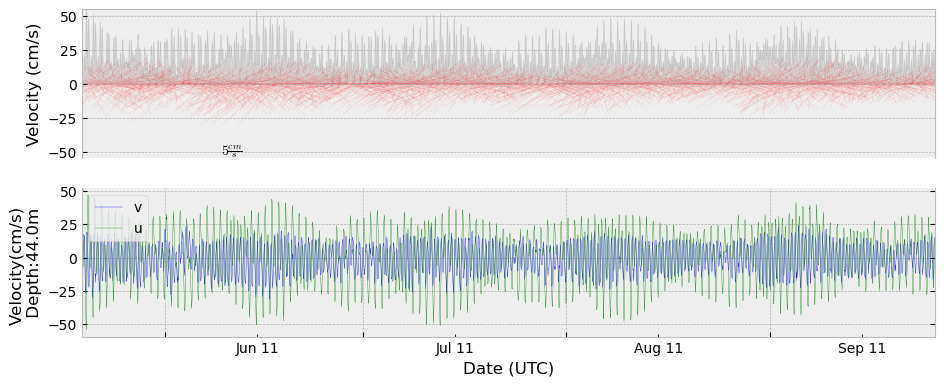

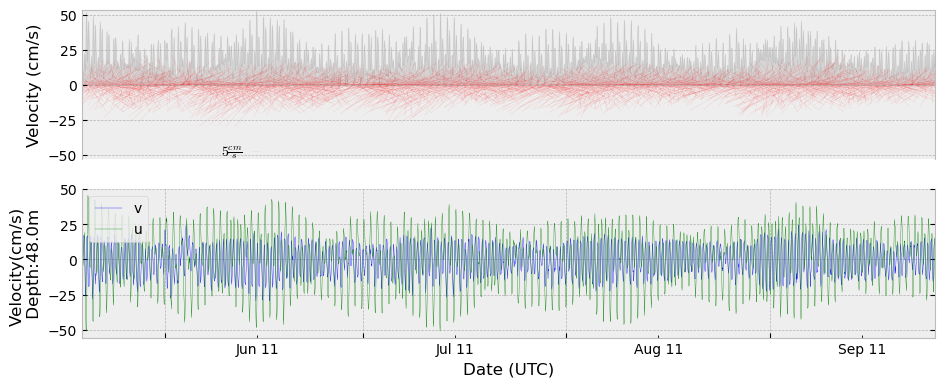

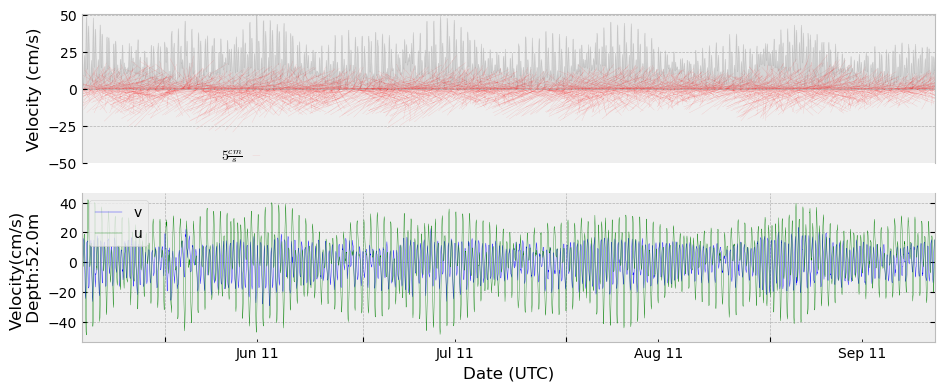

In [26]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [27]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset> Size: 4MB
Dimensions:          (latitude: 1, longitude: 1, time: 3112, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 25kB 2011-05-19T09:00:00 ... 2011-...
  * depth            (depth) float64 144B -16.0 -12.0 -8.0 ... 44.0 48.0 52.0
  * latitude         (latitude) float64 8B 56.86
  * longitude        (longitude) float64 8B -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 448kB 34.42 ....
    v_curr_comp      (latitude, longitude, time, depth) float64 448kB -19.01 ...
    w_curr_comp      (latitude, longitude, time, depth) float64 448kB -2.7 .....
    w_curr_comp_err  (latitude, longitude, time, depth) float64 448kB -6.4 .....
    agc1             (latitude, longitude, time, depth) float64 448kB 88.0 .....
    agc2             (latitude, longitude, time, depth) float64 448kB 91.0 .....
    agc3             (latitude, longitude, time, depth) float64 448kB 91.0 .....
    agc4             (latitude, longitude, time, depth) float64 448kB 88.0 .....
Attributes: (12/13)
    Latitude_DegMMddW:                      56 51.48 N
    Longitude_DegMMddN:                     164 3.72 W
    MooringID:                              11BSP-2A
    platform_deployment_date:               2011-05-19T08:25:00Z
    platform_deployment_cruise_name:        DY1101
    platform_recovery_date:                 2011-09-26T00:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             0.0
    date_created:                           2025-03-04T13:53:59Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [28]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

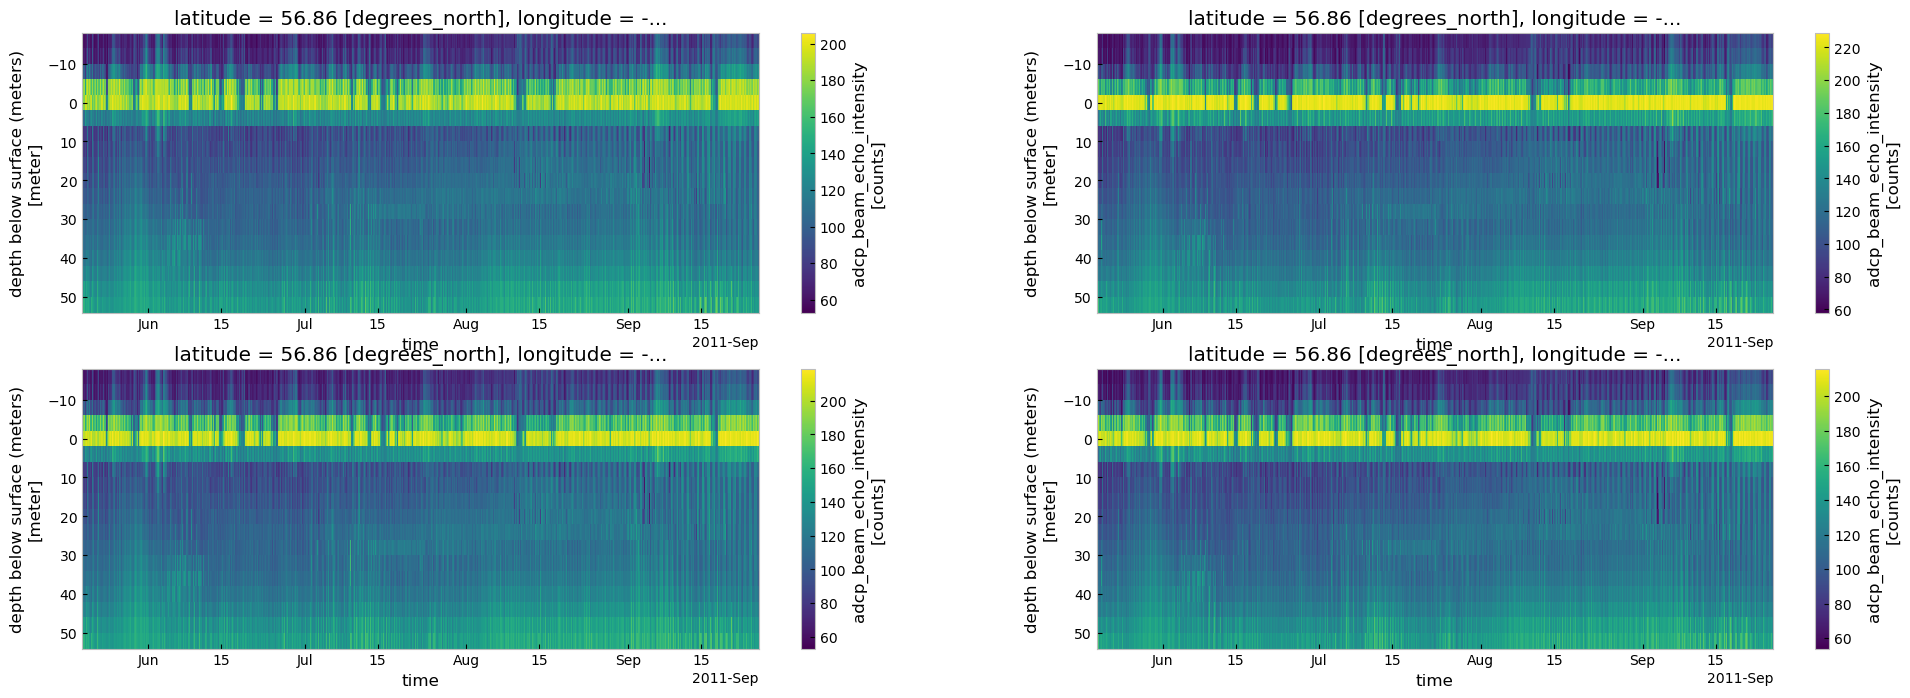

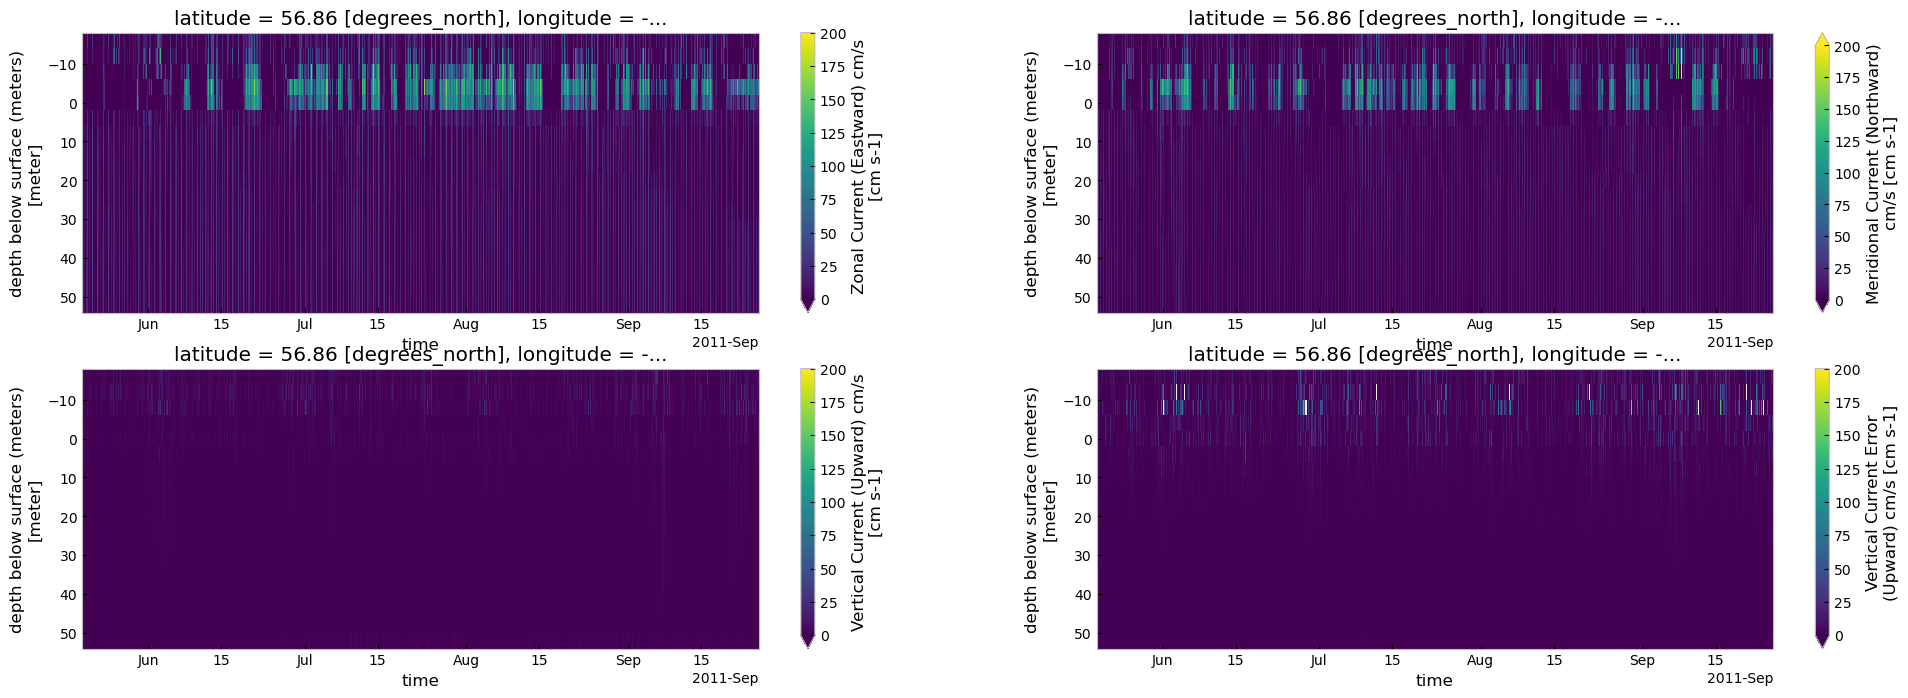

In [29]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [30]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [31]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [32]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [33]:
ixdf.to_netcdf('11bsp2a_0058m.trimmed.nc')

In [34]:
xdf = xa.load_dataset('11bsp2a_0058m.trimmed.nc')

In [35]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [36]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [37]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [38]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

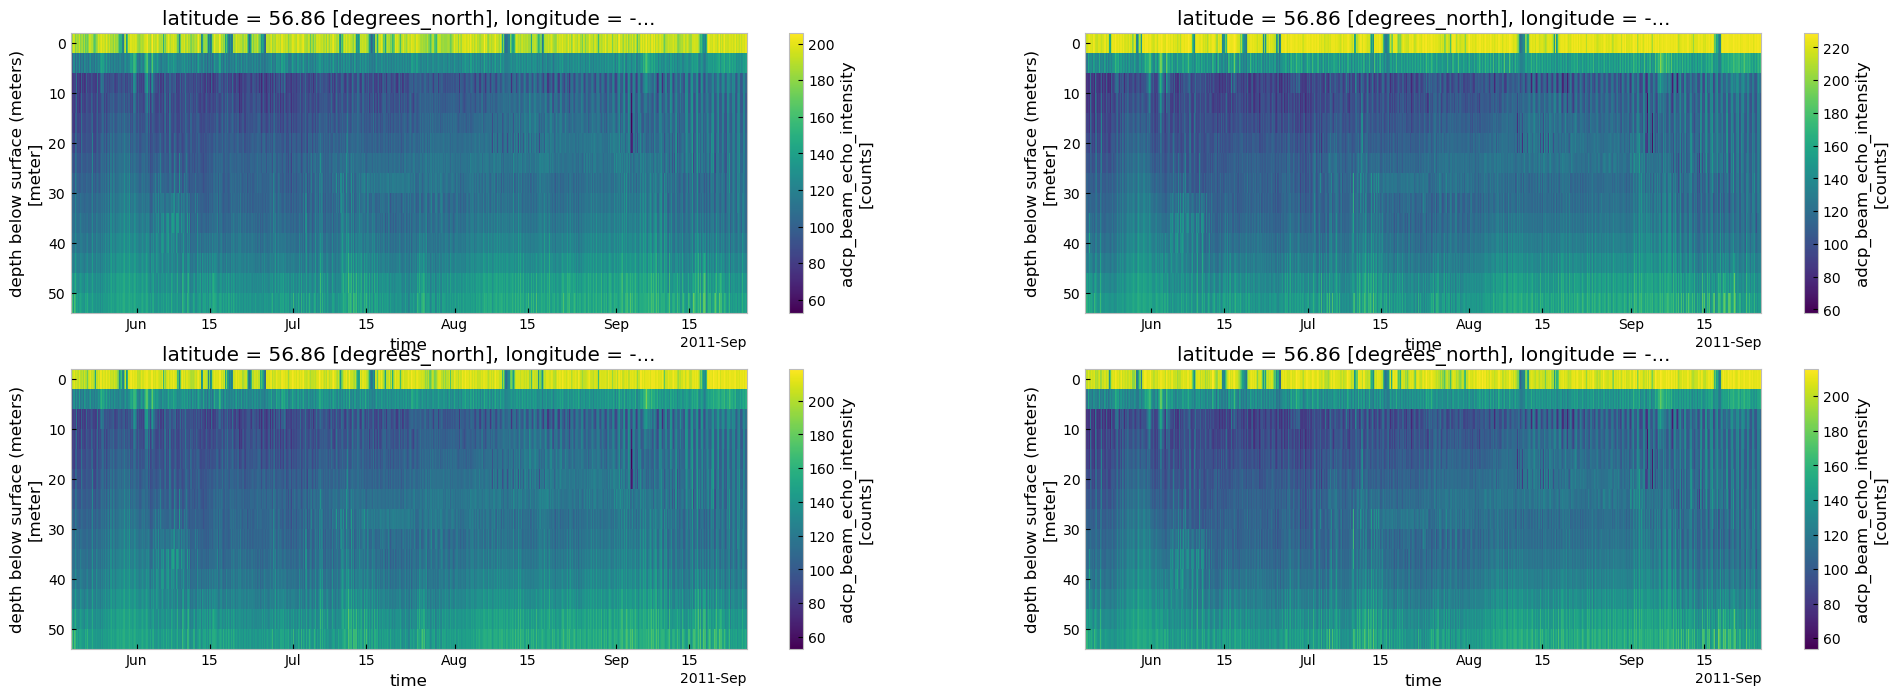

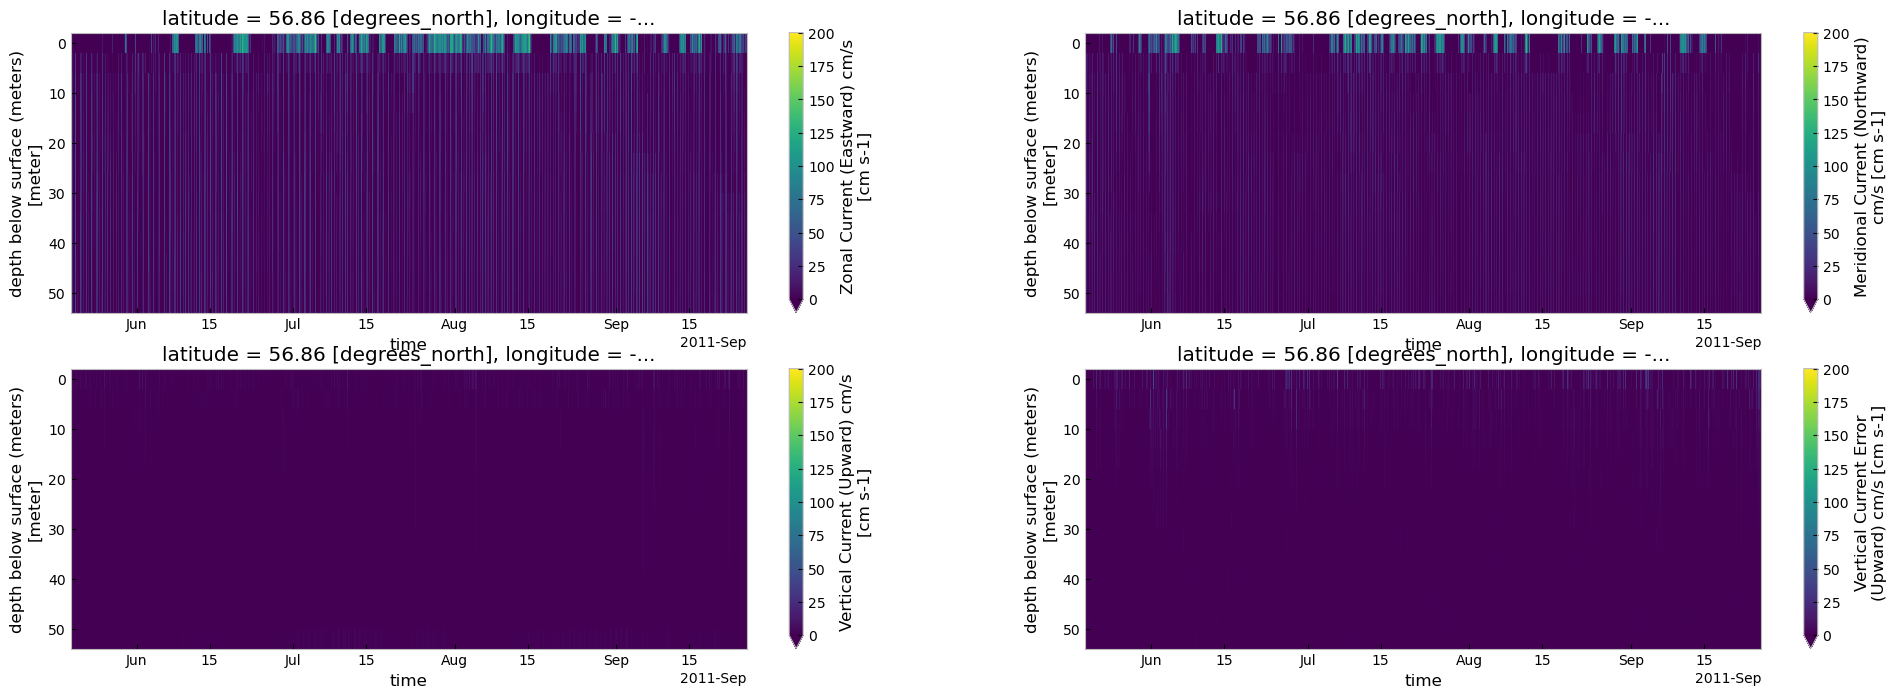

In [39]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [40]:
ixdf.to_netcdf('11bsp2a_0058m.filtered.nc')